In [29]:
# Data Science
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [2]:
crop_yield_data = pd.read_csv("Crop_Yield_Data_challenge_2.csv")
crop_yield_data.head(2)

,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Rice Yield (kg/ha)
0,Chau_Phu,10.510542,105.248554,SA,T,15-07-2022,3.40,5500
1,Chau_Phu,10.509150,105.265098,SA,T,15-07-2022,2.43,6000


In [3]:
Train_data = pd.read_csv("Level2_train_data_NDVI22_RVI19.csv")
print(Train_data.shape)
Train_data.head(2)

(557, 49)


,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Rice Yield (kg/ha),ndvi1,ndvi2,...,rvi10,rvi11,rvi12,rvi13,rvi14,rvi15,rvi16,rvi17,rvi18,rvi19
0,Chau_Phu,10.510542,105.248554,SA,T,15-07-2022,3.40,5500,0.376791,0.376791,...,1.298704,0.905310,0.724559,0.89234,0.992373,1.233590,0.360264,0.951532,0.645184,0.645184
1,Chau_Phu,10.509150,105.265098,SA,T,15-07-2022,2.43,6000,0.408901,0.408901,...,0.687636,0.535123,0.743160,0.54352,0.817069,0.525941,0.676428,0.522760,0.678030,0.678030


In [4]:
Train_feature = pd.read_csv("Level2_train_data_NDVI_RVI_MeanVarMinMaxMedianSumProd.csv")
Train_feature = Train_feature.drop(['Field size (ha)', 'Rice Crop Intensity(D=Double, T=Triple)', 
                                    'Rice Yield (kg/ha)'],axis=1)
print(Train_feature.shape)
Train_feature.head(2)

(557, 14)


,Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod,RVImean,RVIvar,RVImax,RVImin,RVImed,RVIsum,RVIprod
0,0.388765,0.025643,0.570087,0.062684,0.461339,8.552825,3.762249e-11,0.747029,0.135350,1.298704,0.113735,0.739800,14.193546,0.000131
1,0.380674,0.025803,0.556371,0.057865,0.410501,8.374834,1.922881e-11,0.626256,0.008435,0.817069,0.484136,0.623711,11.898865,0.000113


In [5]:
Train_vh_vv = pd.read_csv("crop_data_vh_vv.csv")
Train_vh_vv = Train_vh_vv.drop(['District', 'Latitude', 'Longitude', 'Season(SA = Summer Autumn, WS = Winter Spring)',
                               'Rice Crop Intensity(D=Double, T=Triple)', 'Date of Harvest', 'Field size (ha)',
                                'Rice Yield (kg/ha)'],axis=1)
print(Train_vh_vv.shape)
Train_vh_vv.head(2)

(557, 18)


,min_vv,max_vv,range_vv,mean_vv,correlation_vv,permutation_entropy_vv,min_vh,max_vh,range_vh,mean_vh,correlation_vh,permutation_entropy_vh,min_vv_by_vh,max_vv_by_vh,range_vv_by_vh,mean_vv_by_vh,correlation_vv_by_vh,permutation_entropy_vv_by_vh
0,0.017408,0.357296,0.339888,0.111277,0.621781,0.333963,0.002698,0.051663,0.048966,0.021944,0.042602,0.333963,1.130426,24.872854,23.742429,6.721199,0.342336,0.333963
1,0.053835,0.294100,0.240265,0.166436,0.186905,0.333963,0.016737,0.072512,0.055774,0.038232,0.201433,0.333963,1.580250,7.805157,6.224906,4.583483,-0.212126,0.310551


In [6]:
Train_Full = pd.concat([Train_data,Train_feature, Train_vh_vv], axis=1)
print(Train_Full.shape)
Train_Full.head(2)

(557, 81)


,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Rice Yield (kg/ha),ndvi1,ndvi2,...,range_vh,mean_vh,correlation_vh,permutation_entropy_vh,min_vv_by_vh,max_vv_by_vh,range_vv_by_vh,mean_vv_by_vh,correlation_vv_by_vh,permutation_entropy_vv_by_vh
0,Chau_Phu,10.510542,105.248554,SA,T,15-07-2022,3.40,5500,0.376791,0.376791,...,0.048966,0.021944,0.042602,0.333963,1.130426,24.872854,23.742429,6.721199,0.342336,0.333963
1,Chau_Phu,10.509150,105.265098,SA,T,15-07-2022,2.43,6000,0.408901,0.408901,...,0.055774,0.038232,0.201433,0.333963,1.580250,7.805157,6.224906,4.583483,-0.212126,0.310551


In [216]:
NDVI_RVI_features = pd.read_csv('Level2_NDVI_RVI_features_corr_permutation_entropy.csv') 
NDVI_RVI_features

,min_ndvi,max_ndvi,range_ndvi,mean_ndvi,correlation_ndvi,permutation_entropy_ndvi,min_rvi,max_rvi,range_rvi,mean_rvi,correlation_rvi,permutation_entropy_rvi
0,0.062684,0.570087,0.507403,0.388765,0.853596,0.281894,0.113735,1.298704,1.184969,0.747029,0.520075,0.401118
1,0.057865,0.556371,0.498506,0.380674,0.802596,0.381050,0.484136,0.817069,0.332933,0.626256,-0.658225,0.401118
2,0.138922,0.503938,0.365016,0.336723,0.857084,0.224760,0.179915,1.298710,1.118794,0.777409,0.637547,0.386068
3,0.066051,0.552316,0.486265,0.357108,0.813600,0.334510,0.202505,1.352689,1.150184,0.755394,0.455390,0.401118
4,0.231776,0.580595,0.348818,0.388141,0.823584,0.381050,0.155280,1.316121,1.160840,0.614280,0.694662,0.401118
...,...,...,...,...,...,...,...,...,...,...,...,...
552,-0.137180,0.607354,0.744535,0.345783,0.722432,0.430629,0.101176,1.346688,1.245513,0.741241,0.304482,0.401118
553,-0.080593,0.748630,0.829223,0.364761,0.749776,0.430629,0.104390,1.374105,1.269715,0.719403,0.509392,0.401118
554,0.085882,0.766792,0.680911,0.383447,0.844358,0.418234,0.178629,1.100254,0.921625,0.664772,0.707476,0.401118
555,0.020549,0.813530,0.792981,0.365030,0.842742,0.405839,0.209489,1.343741,1.134252,0.686114,0.433056,0.401118


In [8]:
Train_Full_feature = Train_Full.drop(['District', 'Latitude', 'Longitude', 'Season(SA = Summer Autumn, WS = Winter Spring)',
                                     'Date of Harvest'],axis=1)
Train_Full_feature.columns

Index(['Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)',
       'Rice Yield (kg/ha)', 'ndvi1', 'ndvi2', 'ndvi3', 'ndvi4', 'ndvi5',
       'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9', 'ndvi10', 'ndvi11', 'ndvi12',
       'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16', 'ndvi17', 'ndvi18', 'ndvi19',
       'ndvi20', 'ndvi21', 'ndvi22', 'rvi1', 'rvi2', 'rvi3', 'rvi4', 'rvi5',
       'rvi6', 'rvi7', 'rvi8', 'rvi9', 'rvi10', 'rvi11', 'rvi12', 'rvi13',
       'rvi14', 'rvi15', 'rvi16', 'rvi17', 'rvi18', 'rvi19', 'Nmean', 'Nvar',
       'Nmax', 'Nmin', 'Nmed', 'Nsum', 'Nprod', 'RVImean', 'RVIvar', 'RVImax',
       'RVImin', 'RVImed', 'RVIsum', 'RVIprod', 'min_vv', 'max_vv', 'range_vv',
       'mean_vv', 'correlation_vv', 'permutation_entropy_vv', 'min_vh',
       'max_vh', 'range_vh', 'mean_vh', 'correlation_vh',
       'permutation_entropy_vh', 'min_vv_by_vh', 'max_vv_by_vh',
       'range_vv_by_vh', 'mean_vv_by_vh', 'correlation_vv_by_vh',
       'permutation_entropy_vv_by_vh'],
      dtype='obje

In [218]:
VH_VV_NDVI_RVI_features = pd.concat([Train_Full_feature, NDVI_RVI_features], axis=1)
VH_VV_NDVI_RVI_features.head()

,"Rice Crop Intensity(D=Double, T=Triple)",Field size (ha),Rice Yield (kg/ha),ndvi1,ndvi2,ndvi3,ndvi4,ndvi5,ndvi6,ndvi7,...,range_ndvi,mean_ndvi,correlation_ndvi,permutation_entropy_ndvi,min_rvi,max_rvi,range_rvi,mean_rvi,correlation_rvi,permutation_entropy_rvi
0,1,3.40,5500,0.376791,0.376791,0.378848,0.498826,0.521321,0.543816,0.535979,...,0.507403,0.388765,0.853596,0.281894,0.113735,1.298704,1.184969,0.747029,0.520075,0.401118
1,1,2.43,6000,0.408901,0.408901,0.412102,0.530364,0.543367,0.556371,0.531082,...,0.498506,0.380674,0.802596,0.381050,0.484136,0.817069,0.332933,0.626256,-0.658225,0.401118
2,0,1.95,6400,0.224021,0.465093,0.503938,0.490545,0.495297,0.500048,0.501823,...,0.365016,0.336723,0.857084,0.224760,0.179915,1.298710,1.118794,0.777409,0.637547,0.386068
3,1,4.30,6000,0.509067,0.509067,0.496026,0.547530,0.418933,0.552316,0.536984,...,0.486265,0.357108,0.813600,0.334510,0.202505,1.352689,1.150184,0.755394,0.455390,0.401118
4,0,3.30,6400,0.383767,0.494890,0.357247,0.544007,0.541654,0.539300,0.529429,...,0.348818,0.388141,0.823584,0.381050,0.155280,1.316121,1.160840,0.614280,0.694662,0.401118


In [219]:
VH_VV_NDVI_RVI_features.columns

Index(['Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)',
       'Rice Yield (kg/ha)', 'ndvi1', 'ndvi2', 'ndvi3', 'ndvi4', 'ndvi5',
       'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9', 'ndvi10', 'ndvi11', 'ndvi12',
       'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16', 'ndvi17', 'ndvi18', 'ndvi19',
       'ndvi20', 'ndvi21', 'ndvi22', 'rvi1', 'rvi2', 'rvi3', 'rvi4', 'rvi5',
       'rvi6', 'rvi7', 'rvi8', 'rvi9', 'rvi10', 'rvi11', 'rvi12', 'rvi13',
       'rvi14', 'rvi15', 'rvi16', 'rvi17', 'rvi18', 'rvi19', 'Nmean', 'Nvar',
       'Nmax', 'Nmin', 'Nmed', 'Nsum', 'Nprod', 'RVImean', 'RVIvar', 'RVImax',
       'RVImin', 'RVImed', 'RVIsum', 'RVIprod', 'min_vv', 'max_vv', 'range_vv',
       'mean_vv', 'correlation_vv', 'permutation_entropy_vv', 'min_vh',
       'max_vh', 'range_vh', 'mean_vh', 'correlation_vh',
       'permutation_entropy_vh', 'min_vv_by_vh', 'max_vv_by_vh',
       'range_vv_by_vh', 'mean_vv_by_vh', 'correlation_vv_by_vh',
       'permutation_entropy_vv_by_vh', 'min_ndvi', 'max_n

<Axes: >

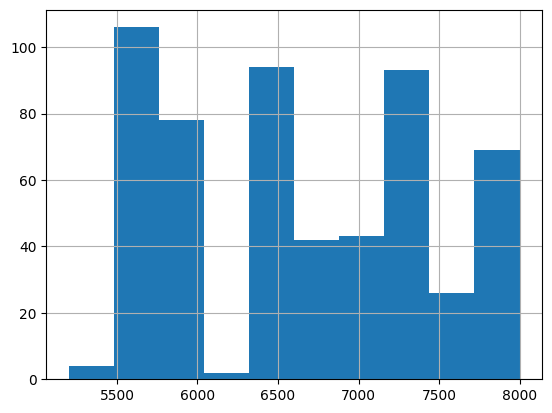

In [9]:
Train_Full_feature['Rice Yield (kg/ha)'].hist()

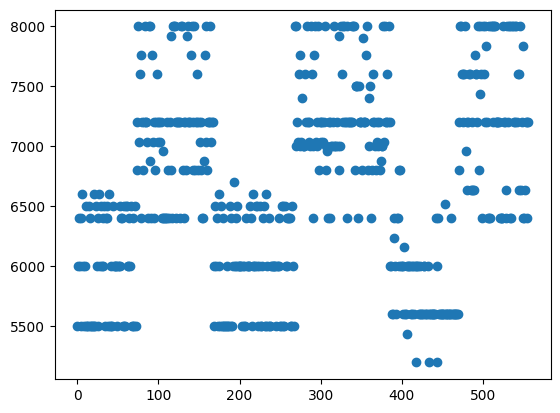

In [10]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(557),Train_Full_feature['Rice Yield (kg/ha)'])

In [11]:
Train_Full_feature['Rice Yield (kg/ha)'].value_counts()

7200    91
6000    78
6400    67
5500    59
8000    55
5600    47
6500    26
6800    25
7000    21
7600    20
7040    16
6640     9
7760     8
6600     7
7500     5
6880     3
6960     3
7920     3
5200     3
7840     2
7400     2
6240     1
6160     1
5440     1
7900     1
6520     1
7440     1
6700     1
Name: Rice Yield (kg/ha), dtype: int64

In [12]:
Test_data = pd.read_csv("Level2_test_data_NDVI22_RVI19.csv")
Test_data.head(2)

,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha),ndvi1,ndvi2,...,rvi10,rvi11,rvi12,rvi13,rvi14,rvi15,rvi16,rvi17,rvi18,rvi19
0,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,NaN,0.282743,0.456203,...,0.901531,1.175484,0.624999,0.458806,0.984826,1.164486,0.763732,0.777978,0.871329,0.756400
1,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,NaN,0.547258,0.465148,...,1.059437,1.056181,0.511672,0.846621,0.585868,0.568651,0.359254,0.937539,0.412829,0.412829


In [13]:
Test_feature = pd.read_csv("Level2_test_data_NDVI_RVI_MeanVarMinMaxMedianSumProd.csv")
Test_feature = Test_feature.drop(['Field size (ha)', 'Rice Crop Intensity(D=Double, T=Triple)'],axis=1)
print(Test_feature.shape)
Test_feature.head(2)

(100, 14)


,Nmean,Nvar,Nmax,Nmin,Nmed,Nsum,Nprod,RVImean,RVIvar,RVImax,RVImin,RVImed,RVIsum,RVIprod
0,0.370607,0.034404,0.594217,-0.029683,0.442068,8.153363,-2.923528e-12,0.666256,0.097908,1.175484,0.145460,0.682880,12.658856,0.000024
1,0.356739,0.028238,0.568067,0.098399,0.380874,7.848265,5.689094e-12,0.725991,0.098739,1.198805,0.141709,0.825177,13.067841,0.000283


In [14]:
Test_vh_vv = pd.read_csv("submission_features_data_vh_vv.csv")
print(Test_vh_vv.shape)
Test_vh_vv.head(2)

(100, 18)


,min_vv,max_vv,range_vv,mean_vv,correlation_vv,permutation_entropy_vv,min_vh,max_vh,range_vh,mean_vh,correlation_vh,permutation_entropy_vh,min_vv_by_vh,max_vv_by_vh,range_vv_by_vh,mean_vv_by_vh,correlation_vv_by_vh,permutation_entropy_vv_by_vh
0,0.011930,0.410706,0.398776,0.14124,0.350355,0.389854,0.002673,0.076014,0.073341,0.022747,0.043280,0.389854,1.332537,41.740932,40.408395,8.627733,0.158149,0.389854
1,0.007153,0.339022,0.331869,0.09133,-0.067242,0.333963,0.002109,0.055057,0.052948,0.022841,0.025769,0.333963,0.501456,19.258476,18.757020,5.119463,-0.176432,0.333963


In [15]:
Test_Full = pd.concat([Test_data,Test_feature, Test_vh_vv], axis=1)
print(Test_Full.shape)
Test_Full.head()

(100, 81)


,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha),ndvi1,ndvi2,...,range_vh,mean_vh,correlation_vh,permutation_entropy_vh,min_vv_by_vh,max_vv_by_vh,range_vv_by_vh,mean_vv_by_vh,correlation_vv_by_vh,permutation_entropy_vv_by_vh
0,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,NaN,0.282743,0.456203,...,0.073341,0.022747,0.043280,0.389854,1.332537,41.740932,40.408395,8.627733,0.158149,0.389854
1,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,NaN,0.547258,0.465148,...,0.052948,0.022841,0.025769,0.333963,0.501456,19.258476,18.757020,5.119463,-0.176432,0.333963
2,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,NaN,0.409212,0.409212,...,0.050966,0.021846,-0.103429,0.333963,1.630832,35.144312,33.513481,8.902166,0.029465,0.333963
3,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,NaN,0.595165,0.680062,...,0.072697,0.026859,0.246400,0.389854,1.515857,22.864404,21.348548,5.037074,-0.103638,0.389854
4,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,NaN,0.544025,0.478349,...,0.088423,0.023020,-0.139512,0.333963,1.372446,21.893630,20.521184,8.472466,0.007432,0.333963


In [16]:
Test_Full_feature = Test_Full.drop(['District', 'Latitude', 'Longitude', 'Season(SA = Summer Autumn, WS = Winter Spring)',
                                     'Date of Harvest'],axis=1)
Test_Full_feature.columns

Index(['Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)',
       'Predicted Rice Yield (kg/ha)', 'ndvi1', 'ndvi2', 'ndvi3', 'ndvi4',
       'ndvi5', 'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9', 'ndvi10', 'ndvi11',
       'ndvi12', 'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16', 'ndvi17', 'ndvi18',
       'ndvi19', 'ndvi20', 'ndvi21', 'ndvi22', 'rvi1', 'rvi2', 'rvi3', 'rvi4',
       'rvi5', 'rvi6', 'rvi7', 'rvi8', 'rvi9', 'rvi10', 'rvi11', 'rvi12',
       'rvi13', 'rvi14', 'rvi15', 'rvi16', 'rvi17', 'rvi18', 'rvi19', 'Nmean',
       'Nvar', 'Nmax', 'Nmin', 'Nmed', 'Nsum', 'Nprod', 'RVImean', 'RVIvar',
       'RVImax', 'RVImin', 'RVImed', 'RVIsum', 'RVIprod', 'min_vv', 'max_vv',
       'range_vv', 'mean_vv', 'correlation_vv', 'permutation_entropy_vv',
       'min_vh', 'max_vh', 'range_vh', 'mean_vh', 'correlation_vh',
       'permutation_entropy_vh', 'min_vv_by_vh', 'max_vv_by_vh',
       'range_vv_by_vh', 'mean_vv_by_vh', 'correlation_vv_by_vh',
       'permutation_entropy_vv_by_vh'],
      d

In [246]:
Test_NDVI_RVI_features = pd.read_csv("Level2_Test_NDVI_RVI_features_corr_permutation_entropy.csv")

In [247]:
Test_VH_VV_NDVI_RVI_features = pd.concat([Test_Full_feature, Test_NDVI_RVI_features], axis=1)
Test_VH_VV_NDVI_RVI_features.head()

,"Rice Crop Intensity(D=Double, T=Triple)",Field size (ha),Predicted Rice Yield (kg/ha),ndvi1,ndvi2,ndvi3,ndvi4,ndvi5,ndvi6,ndvi7,...,range_ndvi,mean_ndvi,correlation_ndvi,permutation_entropy_ndvi,min_rvi,max_rvi,range_rvi,mean_rvi,correlation_rvi,permutation_entropy_rvi
0,1,1.40,NaN,0.282743,0.456203,0.594217,0.442556,0.431979,0.449025,0.535366,...,0.623899,0.370607,0.795286,0.430629,0.145460,1.175484,1.030024,0.666256,0.392945,0.371017
1,1,1.32,NaN,0.547258,0.465148,0.383037,0.535284,0.378712,0.568067,0.541296,...,0.469668,0.356739,0.826928,0.381050,0.141709,1.198805,1.057095,0.709509,0.196767,0.401118
2,0,1.40,NaN,0.409212,0.409212,0.484517,0.489335,0.499692,0.510049,0.508518,...,0.488019,0.364040,0.790811,0.401161,0.176745,1.200444,1.023698,0.661674,0.409633,0.401118
3,0,1.80,NaN,0.595165,0.680062,0.718707,0.539280,0.562533,0.540928,0.559000,...,0.641450,0.410821,0.894151,0.281894,0.162929,1.301266,1.138337,0.842393,0.222570,0.401118
4,1,2.20,NaN,0.544025,0.478349,0.412673,0.565902,0.511011,0.456121,0.522443,...,0.641186,0.312800,0.760323,0.418234,0.119191,1.233110,1.113919,0.631672,0.668646,0.401118


In [17]:
Train_Full_feature['Rice Crop Intensity(D=Double, T=Triple)'] = Train_Full_feature['Rice Crop Intensity(D=Double, T=Triple)'].map({'T':1,'D':0})

In [18]:
Train_Full_feature.head()

,"Rice Crop Intensity(D=Double, T=Triple)",Field size (ha),Rice Yield (kg/ha),ndvi1,ndvi2,ndvi3,ndvi4,ndvi5,ndvi6,ndvi7,...,range_vh,mean_vh,correlation_vh,permutation_entropy_vh,min_vv_by_vh,max_vv_by_vh,range_vv_by_vh,mean_vv_by_vh,correlation_vv_by_vh,permutation_entropy_vv_by_vh
0,1,3.40,5500,0.376791,0.376791,0.378848,0.498826,0.521321,0.543816,0.535979,...,0.048966,0.021944,0.042602,0.333963,1.130426,24.872854,23.742429,6.721199,0.342336,0.333963
1,1,2.43,6000,0.408901,0.408901,0.412102,0.530364,0.543367,0.556371,0.531082,...,0.055774,0.038232,0.201433,0.333963,1.580250,7.805157,6.224906,4.583483,-0.212126,0.310551
2,0,1.95,6400,0.224021,0.465093,0.503938,0.490545,0.495297,0.500048,0.501823,...,0.105967,0.036390,0.026166,0.333963,0.994616,46.363490,45.368874,9.063073,0.171531,0.333963
3,1,4.30,6000,0.509067,0.509067,0.496026,0.547530,0.418933,0.552316,0.536984,...,0.080793,0.025339,0.192489,0.333963,1.664036,28.349087,26.685050,7.416280,0.502445,0.333963
4,0,3.30,6400,0.383767,0.494890,0.357247,0.544007,0.541654,0.539300,0.529429,...,0.090679,0.033238,-0.039257,0.389854,1.338847,29.232963,27.894115,6.989110,0.520591,0.389854


In [220]:
X = VH_VV_NDVI_RVI_features.drop(['Rice Yield (kg/ha)'],axis=1)
X.columns

Index(['Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)', 'ndvi1',
       'ndvi2', 'ndvi3', 'ndvi4', 'ndvi5', 'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9',
       'ndvi10', 'ndvi11', 'ndvi12', 'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16',
       'ndvi17', 'ndvi18', 'ndvi19', 'ndvi20', 'ndvi21', 'ndvi22', 'rvi1',
       'rvi2', 'rvi3', 'rvi4', 'rvi5', 'rvi6', 'rvi7', 'rvi8', 'rvi9', 'rvi10',
       'rvi11', 'rvi12', 'rvi13', 'rvi14', 'rvi15', 'rvi16', 'rvi17', 'rvi18',
       'rvi19', 'Nmean', 'Nvar', 'Nmax', 'Nmin', 'Nmed', 'Nsum', 'Nprod',
       'RVImean', 'RVIvar', 'RVImax', 'RVImin', 'RVImed', 'RVIsum', 'RVIprod',
       'min_vv', 'max_vv', 'range_vv', 'mean_vv', 'correlation_vv',
       'permutation_entropy_vv', 'min_vh', 'max_vh', 'range_vh', 'mean_vh',
       'correlation_vh', 'permutation_entropy_vh', 'min_vv_by_vh',
       'max_vv_by_vh', 'range_vv_by_vh', 'mean_vv_by_vh',
       'correlation_vv_by_vh', 'permutation_entropy_vv_by_vh', 'min_ndvi',
       'max_ndvi', 'range_ndvi', 'm

In [221]:
y = Train_data['Rice Yield (kg/ha)']

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=2023)

In [224]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 200, 300, 400,500],
    'max_depth': [1,2,3,4,5,6,7,8],
    'max_features': ['sqrt',],
    'criterion' :['squared_error',]
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters , cv= 5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt'],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             verbose=1)

In [225]:
clf.best_estimator_

RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=400,
                      random_state=0)

In [226]:
clf.best_score_

0.5903601402664258

In [227]:
model = clf.best_estimator_

In [228]:
insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.90
Outsample R2 Score: 0.64


In [229]:
best_model = clf.best_estimator_
print(sum(best_model.feature_importances_))
best_model.feature_importances_

1.0


array([0.00071558, 0.00351105, 0.00835441, 0.02579172, 0.05925207,
       0.01272316, 0.00732156, 0.010954  , 0.01147449, 0.01242883,
       0.00522077, 0.00629956, 0.00824483, 0.00994237, 0.00993002,
       0.0079078 , 0.00509132, 0.00459773, 0.00770294, 0.02244311,
       0.01518414, 0.00584076, 0.00574268, 0.00648125, 0.00530185,
       0.00417905, 0.00708862, 0.00776381, 0.00642749, 0.00396178,
       0.00667516, 0.00902093, 0.00534721, 0.00964944, 0.02067578,
       0.00492928, 0.02679391, 0.00863455, 0.00685859, 0.0061294 ,
       0.00582212, 0.01326307, 0.00521001, 0.00494162, 0.00992182,
       0.06532231, 0.0051298 , 0.00551919, 0.00460116, 0.        ,
       0.00416689, 0.00394785, 0.00344916, 0.00573243, 0.0050438 ,
       0.00462914, 0.00394686, 0.00615368, 0.00317665, 0.00352494,
       0.00441904, 0.00438731, 0.07578206, 0.00393529, 0.0048955 ,
       0.00371859, 0.00370722, 0.00732828, 0.06671433, 0.00425051,
       0.00615027, 0.00596487, 0.00442113, 0.0045846 , 0.07526

In [230]:
best_model.feature_names_in_

array(['Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)',
       'ndvi1', 'ndvi2', 'ndvi3', 'ndvi4', 'ndvi5', 'ndvi6', 'ndvi7',
       'ndvi8', 'ndvi9', 'ndvi10', 'ndvi11', 'ndvi12', 'ndvi13', 'ndvi14',
       'ndvi15', 'ndvi16', 'ndvi17', 'ndvi18', 'ndvi19', 'ndvi20',
       'ndvi21', 'ndvi22', 'rvi1', 'rvi2', 'rvi3', 'rvi4', 'rvi5', 'rvi6',
       'rvi7', 'rvi8', 'rvi9', 'rvi10', 'rvi11', 'rvi12', 'rvi13',
       'rvi14', 'rvi15', 'rvi16', 'rvi17', 'rvi18', 'rvi19', 'Nmean',
       'Nvar', 'Nmax', 'Nmin', 'Nmed', 'Nsum', 'Nprod', 'RVImean',
       'RVIvar', 'RVImax', 'RVImin', 'RVImed', 'RVIsum', 'RVIprod',
       'min_vv', 'max_vv', 'range_vv', 'mean_vv', 'correlation_vv',
       'permutation_entropy_vv', 'min_vh', 'max_vh', 'range_vh',
       'mean_vh', 'correlation_vh', 'permutation_entropy_vh',
       'min_vv_by_vh', 'max_vv_by_vh', 'range_vv_by_vh', 'mean_vv_by_vh',
       'correlation_vv_by_vh', 'permutation_entropy_vv_by_vh', 'min_ndvi',
       'max_ndvi', 'range_nd

In [231]:
lst1=best_model.feature_names_in_
lst2=best_model.feature_importances_
IMP_Features = pd.DataFrame(list(zip(lst1, lst2)))

In [232]:
IMP_Features.columns =[ 'Name', 'Weight']

In [233]:
IMP_Features = IMP_Features.sort_values(by=['Weight'], ascending=False)
IMP_Features_Lst = IMP_Features.head(25)['Name'].values
print(len(IMP_Features_Lst))
IMP_Features_Lst

25


array(['permutation_entropy_vv', 'permutation_entropy_vv_by_vh',
       'permutation_entropy_vh', 'Nmax', 'ndvi3', 'max_ndvi',
       'range_ndvi', 'rvi13', 'ndvi2', 'ndvi18', 'rvi11', 'ndvi19',
       'correlation_ndvi', 'rvi18', 'ndvi4', 'ndvi8', 'ndvi7', 'ndvi6',
       'ndvi12', 'ndvi13', 'Nvar', 'rvi10', 'permutation_entropy_ndvi',
       'rvi8', 'rvi14'], dtype=object)

In [234]:
X_imp = X[IMP_Features_Lst]
X_imp

,permutation_entropy_vv,permutation_entropy_vv_by_vh,permutation_entropy_vh,Nmax,ndvi3,max_ndvi,range_ndvi,rvi13,ndvi2,ndvi18,...,ndvi8,ndvi7,ndvi6,ndvi12,ndvi13,Nvar,rvi10,permutation_entropy_ndvi,rvi8,rvi14
0,0.333963,0.333963,0.333963,0.570087,0.378848,0.570087,0.507403,0.892340,0.376791,0.237042,...,0.553033,0.535979,0.543816,0.485722,0.475969,0.025643,1.298704,0.281894,1.249259,0.992373
1,0.333963,0.310551,0.333963,0.556371,0.412102,0.556371,0.498506,0.543520,0.408901,0.287279,...,0.531229,0.531082,0.556371,0.452867,0.426957,0.025803,0.687636,0.381050,0.759752,0.817069
2,0.333963,0.333963,0.333963,0.503938,0.503938,0.503938,0.365016,0.699925,0.465093,0.173584,...,0.486634,0.501823,0.500048,0.357838,0.301156,0.021059,1.146596,0.224760,1.298710,0.835756
3,0.333963,0.333963,0.333963,0.552316,0.496026,0.552316,0.486265,0.609161,0.509067,0.139349,...,0.456716,0.536984,0.552316,0.441300,0.409183,0.028015,1.083723,0.334510,1.208616,0.694525
4,0.389854,0.389854,0.389854,0.580595,0.357247,0.580595,0.348818,0.362494,0.494890,0.244118,...,0.555012,0.529429,0.539300,0.368487,0.307967,0.015873,0.660723,0.381050,1.316121,0.418922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0.349977,0.349977,0.349977,0.607354,0.607354,0.607354,0.744535,1.305578,0.233307,0.083973,...,0.605638,0.446802,0.461503,0.553633,0.425278,0.048633,0.906061,0.430629,1.038760,0.646708
553,0.349977,0.349977,0.349977,0.748630,0.748630,0.748630,0.829223,1.374105,0.485319,0.102654,...,0.583819,0.428291,0.462035,0.484634,0.394985,0.042246,1.020702,0.430629,1.087444,0.677953
554,0.349977,0.349977,0.349977,0.766792,0.766792,0.766792,0.680911,1.100254,0.684690,0.085882,...,0.565121,0.463539,0.479987,0.450725,0.365754,0.034693,0.850865,0.418234,0.843983,0.909127
555,0.349977,0.349977,0.349977,0.813530,0.813530,0.813530,0.792981,0.747255,0.575974,0.020549,...,0.602548,0.551510,0.550209,0.470257,0.396485,0.053701,0.987850,0.405839,1.158239,0.660174


In [235]:
X_train, X_test, y_train, y_test = train_test_split(X_imp,y,test_size=0.3,shuffle=True,random_state=2023)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((389, 25), (168, 25), (389,), (168,))

In [236]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 200, 300, 400,500],
    'max_depth': [3,4,5,6,7,8,9,10],
    'max_features': ['sqrt',],
    'criterion' :['squared_error',],
    'min_samples_split' : [2,3,4],
    #'max_leaf_nodes': [2,3]
}
regr = RandomForestRegressor(random_state=0,oob_score=True)

clf = GridSearchCV(regr, parameters , cv= 5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=0),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [237]:
clf.best_estimator_

RandomForestRegressor(max_depth=8, max_features='sqrt', oob_score=True,
                      random_state=0)

In [238]:
clf.best_score_

0.61920241718695

In [239]:
model = clf.best_estimator_

In [240]:
insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.89
Outsample R2 Score: 0.65


In [242]:
params = pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score'], ascending=True)
params.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
75,0.215289,0.005265,0.006997,0.004199,squared_error,8,sqrt,2,100,"{'criterion': 'squared_error', 'max_depth': 8,...",0.641941,0.650785,0.591278,0.570716,0.641292,0.619202,0.032041,1
82,2.359379,0.309378,0.109632,0.024346,squared_error,8,sqrt,3,300,"{'criterion': 'squared_error', 'max_depth': 8,...",0.649026,0.645784,0.596427,0.570372,0.630999,0.618522,0.030450,2
70,0.204253,0.006672,0.006201,0.003652,squared_error,7,sqrt,4,100,"{'criterion': 'squared_error', 'max_depth': 7,...",0.660801,0.652582,0.575911,0.566031,0.635055,0.618076,0.039474,3
83,2.706084,0.590169,0.086707,0.022067,squared_error,8,sqrt,3,400,"{'criterion': 'squared_error', 'max_depth': 8,...",0.649784,0.647487,0.591991,0.566870,0.629989,0.617224,0.032592,4
71,0.403872,0.004722,0.011965,0.000895,squared_error,7,sqrt,4,200,"{'criterion': 'squared_error', 'max_depth': 7,...",0.664322,0.652006,0.578047,0.561299,0.629246,0.616984,0.040582,5


In [243]:
sxc = params[params['rank_test_score']==3]['params'].values
sxc

array([{'criterion': 'squared_error', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}],
      dtype=object)

In [244]:
regr = RandomForestRegressor(random_state=0, criterion='squared_error', max_depth= 7,min_samples_split= 4,
                             max_features= 'sqrt', n_estimators= 100)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_split=4,
                      random_state=0)

In [245]:
insample_predictions = regr.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = regr.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.86
Outsample R2 Score: 0.64


In [31]:
Test_Full_feature['Rice Crop Intensity(D=Double, T=Triple)'] = Test_Full_feature['Rice Crop Intensity(D=Double, T=Triple)'].map({'T':1, 'D':0 })

In [248]:
submission_data = Test_VH_VV_NDVI_RVI_features.drop('Predicted Rice Yield (kg/ha)',axis=1)
submission_data = submission_data[IMP_Features_Lst]
submission_data

,permutation_entropy_vv,permutation_entropy_vv_by_vh,permutation_entropy_vh,Nmax,ndvi3,max_ndvi,range_ndvi,rvi13,ndvi2,ndvi18,...,ndvi8,ndvi7,ndvi6,ndvi12,ndvi13,Nvar,rvi10,permutation_entropy_ndvi,rvi8,rvi14
0,0.389854,0.389854,0.389854,0.594217,0.594217,0.594217,0.623899,0.458806,0.456203,0.079467,...,0.588129,0.535366,0.449025,0.507885,0.453811,0.034404,0.901531,0.430629,0.171592,0.984826
1,0.333963,0.333963,0.333963,0.568067,0.383037,0.568067,0.469668,0.846621,0.465148,0.109745,...,0.534345,0.541296,0.568067,0.411981,0.367057,0.028238,1.059437,0.381050,0.970548,0.585868
2,0.333963,0.333963,0.333963,0.564209,0.484517,0.564209,0.488019,0.723554,0.409212,0.251709,...,0.536363,0.508518,0.510049,0.391675,0.348289,0.022833,0.666229,0.401161,0.839250,0.955999
3,0.389854,0.389854,0.389854,0.718707,0.718707,0.718707,0.641450,0.735566,0.680062,0.140869,...,0.545691,0.559000,0.540928,0.459133,0.405043,0.036894,1.011889,0.281894,1.128584,0.866444
4,0.333963,0.333963,0.333963,0.565902,0.412673,0.565902,0.641186,0.451317,0.478349,0.214695,...,0.458322,0.522443,0.456121,0.306778,0.243581,0.033893,0.865627,0.418234,1.049015,0.380348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.333963,0.333963,0.333963,0.517535,0.478505,0.517535,0.479279,1.127697,0.466455,0.171743,...,0.044119,0.517535,0.472785,0.399912,0.379783,0.024941,1.040906,0.363978,1.241694,0.542778
96,0.389854,0.373646,0.373646,0.648603,0.648603,0.648603,0.574305,1.223890,0.464073,0.076614,...,0.507143,0.604977,0.542176,0.493914,0.453130,0.032418,1.031595,0.430629,0.716646,0.997584
97,0.333963,0.333963,0.333963,0.535602,0.512471,0.535602,0.471188,0.848954,0.504941,0.096054,...,0.521092,0.515669,0.535602,0.365410,0.306195,0.030209,1.322701,0.308843,0.824636,0.716213
98,0.333963,0.333963,0.310551,0.576071,0.566751,0.576071,0.528799,0.932581,0.524255,0.163176,...,0.552859,0.576071,0.567390,0.398136,0.344322,0.035576,0.936897,0.356261,1.174766,0.609646


In [249]:
#Making predictions
final_predictions = model.predict(submission_data.values)
final_prediction_series = pd.Series(final_predictions.flatten())


C:\Users\UU797EN\AppData\Local\miniconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [250]:
test_file = pd.read_csv('Challenge_2_submission_template.csv')
test_file.head()

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,NaN
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,NaN
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,NaN
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,NaN
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,NaN


In [251]:
#Combining the results into dataframe
test_file['Predicted Rice Yield (kg/ha)']=list(final_prediction_series)

In [252]:
test_file

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,7276.683485
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,5990.885868
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,5919.339604
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,7289.611481
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,5948.358604
...,...,...,...,...,...,...,...,...,...
95,96,Chau_Thanh,10.435839,105.132981,SA,D,26-07-2022,1.21,6255.929387
96,97,Chau_Phu,10.529357,105.147388,WS,T,10-04-2022,2.00,7061.396360
97,98,Chau_Thanh,10.452537,105.205118,SA,T,20-07-2022,5.50,6105.774729
98,99,Chau_Thanh,10.394341,105.126836,SA,T,14-07-2022,4.40,5791.899264


In [253]:
#Dumping the predictions into a csv file.
test_file.to_csv("challenge_2_submission_rice_crop_yield_pred_top25Fearures_permut_corr_RandomForest.csv",index = False)

In [167]:
import statsmodels.api as sm

In [170]:
correlation_ndvi = sm.tsa.acf(Train_data['ndvi1'])[1]

In [171]:
correlation_ndvi

0.5248502212452326

In [203]:
"""
def fn_calculate_mean_variance(row,cols = cols):
    row['mean'] = row[cols].mean()
    row['variance'] = row[cols].var()

    return row
"""
ndvi_col=['ndvi1', 'ndvi2', 'ndvi3', 'ndvi4', 'ndvi5', 'ndvi6', 'ndvi7',
       'ndvi8', 'ndvi9', 'ndvi10', 'ndvi11', 'ndvi12', 'ndvi13', 'ndvi14',
       'ndvi15', 'ndvi16', 'ndvi17', 'ndvi18', 'ndvi19', 'ndvi20',
       'ndvi21', 'ndvi22']
    
def correlation_ndvi(row,cols = ndvi_col):
   
    
    row['correlation_ndvi3']= row[ndvi_col]
    row['correlation_ndvi3']=sm.tsa.acf(row['correlation_ndvi3'])[1]
    
    return row

In [204]:
df_corr = Train_data.apply(correlation_ndvi,axis=1)

In [205]:
df_corr['correlation_ndvi3']

0      0.853596
1      0.802596
2      0.857084
3      0.813600
4      0.823584
         ...   
552    0.722432
553    0.749776
554    0.844358
555    0.842742
556    0.798644
Name: correlation_ndvi3, Length: 557, dtype: float64

In [209]:
df_corr[['Rice Yield (kg/ha)','correlation_ndvi3']]

,Rice Yield (kg/ha),correlation_ndvi3
0,5500,0.853596
1,6000,0.802596
2,6400,0.857084
3,6000,0.813600
4,6400,0.823584
...,...,...
552,6640,0.722432
553,7200,0.749776
554,7200,0.844358
555,6400,0.842742


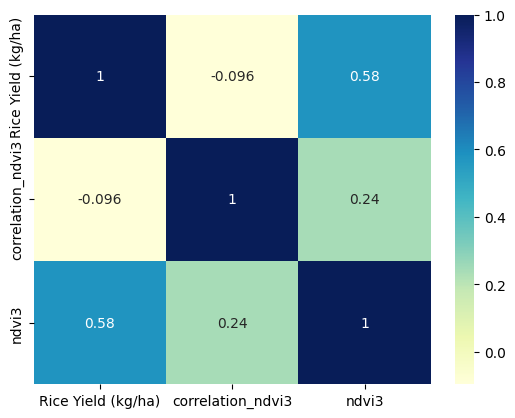

In [211]:
import seaborn as sns
# plotting correlation heatmap
dataplot = sns.heatmap(df_corr[['Rice Yield (kg/ha)','correlation_ndvi3','ndvi3']].corr(), cmap="YlGnBu", annot=True)

In [212]:
def permutation_entropy(data, dx=3, dy=1, taux=1, tauy=1, base=2, normalized=True, probs=False, tie_precision=None):
    if not probs:
        _, probabilities = ordinal_distribution(data, dx, dy, taux, tauy, return_missing=False, tie_precision=tie_precision)
    else:
        probabilities = np.asarray(data)
        probabilities = probabilities[probabilities>0]

    if normalized==True and base in [2, '2']:        
        smax = np.log2(float(np.math.factorial(dx*dy)))
        s    = -np.sum(probabilities*np.log2(probabilities))
        return s/smax
         
    elif normalized==True and base=='e':        
        smax = np.log(float(np.math.factorial(dx*dy)))
        s    = -np.sum(probabilities*np.log(probabilities))
        return s/smax
    
    elif normalized==False and base in [2, '2']:
        return -np.sum(probabilities*np.log2(probabilities))
    else:
        return -np.sum(probabilities*np.log(probabilities))

In [215]:
permutation_entropy_vh = permutation_entropy(df_corr[ndvi_col], dx=6, base=2, normalized=True)

NameError: name 'ordinal_distribution' is not defined

In [177]:
import tensorflow as tf

In [191]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                             patience = 50,
                                             mode = 'auto',
                                             baseline = None,
                                             restore_best_weights = True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                factor=0.1,
                                                patience=30)

In [194]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=[75,]))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1000,activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(2000,activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(300,activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1,activation='relu'))

In [195]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 75)                0         
                                                                 
 dense_59 (Dense)            (None, 1000)              76000     
                                                                 
 dense_60 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_61 (Dense)            (None, 300)               600300    
                                                                 
 dense_62 (Dense)            (None, 100)               30100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_63 (Dense)            (None, 1)               

In [196]:
model.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer='adam',
             metrics=[tf.keras.metrics.MeanSquaredError()])

In [197]:
history = model.fit(X_train,y_train,
                   epochs=300,
                   validation_data=(X_test, y_test), callbacks = [reduce_lr,early_stop])

Epoch 1/300
13/13 [==============================] - 2s 68ms/step - loss: 42690076.0000 - mean_squared_error: 42690076.0000 - val_loss: 33287524.0000 - val_mean_squared_error: 33287524.0000 - lr: 0.0010
Epoch 2/300
13/13 [==============================] - 1s 55ms/step - loss: 17410292.0000 - mean_squared_error: 17410292.0000 - val_loss: 7319855.0000 - val_mean_squared_error: 7319855.0000 - lr: 0.0010
Epoch 3/300
13/13 [==============================] - 1s 55ms/step - loss: 6291198.0000 - mean_squared_error: 6291198.0000 - val_loss: 3665814.0000 - val_mean_squared_error: 3665814.0000 - lr: 0.0010
Epoch 4/300
13/13 [==============================] - 1s 56ms/step - loss: 3086671.2500 - mean_squared_error: 3086671.2500 - val_loss: 1558457.6250 - val_mean_squared_error: 1558457.6250 - lr: 0.0010
Epoch 5/300
13/13 [==============================] - 1s 57ms/step - loss: 1865360.7500 - mean_squared_error: 1865360.7500 - val_loss: 863430.7500 - val_mean_squared_error: 863430.7500 - lr: 0.0010
E

Epoch 84/300
13/13 [==============================] - 1s 60ms/step - loss: 793424.3750 - mean_squared_error: 793424.3750 - val_loss: 450539.4375 - val_mean_squared_error: 450539.4375 - lr: 0.0010
Epoch 85/300
13/13 [==============================] - 1s 59ms/step - loss: 692398.1250 - mean_squared_error: 692398.1250 - val_loss: 383906.0000 - val_mean_squared_error: 383906.0000 - lr: 0.0010
Epoch 86/300
13/13 [==============================] - 1s 59ms/step - loss: 709897.0625 - mean_squared_error: 709897.0625 - val_loss: 355802.5625 - val_mean_squared_error: 355802.5625 - lr: 0.0010
Epoch 87/300
13/13 [==============================] - 1s 60ms/step - loss: 760363.7500 - mean_squared_error: 760363.7500 - val_loss: 349147.7500 - val_mean_squared_error: 349147.7500 - lr: 0.0010
Epoch 88/300
13/13 [==============================] - 1s 61ms/step - loss: 697927.1875 - mean_squared_error: 697927.1875 - val_loss: 372459.4688 - val_mean_squared_error: 372459.4688 - lr: 0.0010
Epoch 89/300
13/13 [

Epoch 126/300
13/13 [==============================] - 1s 58ms/step - loss: 744925.6875 - mean_squared_error: 744925.6875 - val_loss: 356901.7500 - val_mean_squared_error: 356901.7500 - lr: 0.0010
Epoch 127/300
13/13 [==============================] - 1s 55ms/step - loss: 623511.3750 - mean_squared_error: 623511.3750 - val_loss: 427555.7188 - val_mean_squared_error: 427555.7188 - lr: 0.0010
Epoch 128/300
13/13 [==============================] - 1s 59ms/step - loss: 599045.2500 - mean_squared_error: 599045.2500 - val_loss: 328596.3438 - val_mean_squared_error: 328596.3438 - lr: 0.0010
Epoch 129/300
13/13 [==============================] - 1s 57ms/step - loss: 633755.6250 - mean_squared_error: 633755.6250 - val_loss: 393734.0625 - val_mean_squared_error: 393734.0625 - lr: 0.0010
Epoch 130/300
13/13 [==============================] - 1s 58ms/step - loss: 709093.2500 - mean_squared_error: 709093.2500 - val_loss: 428818.2500 - val_mean_squared_error: 428818.2500 - lr: 0.0010
Epoch 131/300
1

13/13 [==============================] - 1s 64ms/step - loss: 570521.1250 - mean_squared_error: 570521.1250 - val_loss: 343871.1562 - val_mean_squared_error: 343871.1562 - lr: 1.0000e-04
Epoch 209/300
13/13 [==============================] - 1s 59ms/step - loss: 622951.1875 - mean_squared_error: 622951.1875 - val_loss: 326802.6250 - val_mean_squared_error: 326802.6250 - lr: 1.0000e-04
Epoch 210/300
13/13 [==============================] - 1s 56ms/step - loss: 571929.4375 - mean_squared_error: 571929.4375 - val_loss: 333561.1875 - val_mean_squared_error: 333561.1875 - lr: 1.0000e-04
Epoch 211/300
13/13 [==============================] - 1s 63ms/step - loss: 599121.4375 - mean_squared_error: 599121.4375 - val_loss: 327121.0000 - val_mean_squared_error: 327121.0000 - lr: 1.0000e-04
Epoch 212/300
13/13 [==============================] - 1s 61ms/step - loss: 589089.8125 - mean_squared_error: 589089.8125 - val_loss: 343947.8125 - val_mean_squared_error: 343947.8125 - lr: 1.0000e-04


In [198]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train),r2_score(y_test,y_pred_test)

6/6 [==============================] - 0s 7ms/step


(0.5567148596460685, 0.5282185178744196)

In [96]:
Train_time_series = Train_data.melt(id_vars =['Rice Yield (kg/ha)'], value_vars =['ndvi1', 'ndvi2'], 
        var_name ='Variable_column', value_name ='Value_column')

Train_time_series

,Rice Yield (kg/ha),Variable_column,Value_column
0,5500,ndvi1,0.376791
1,6000,ndvi1,0.408901
2,6400,ndvi1,0.224021
3,6000,ndvi1,0.509067
4,6400,ndvi1,0.383767
5,5500,ndvi2,0.376791
6,6000,ndvi2,0.408901
7,6400,ndvi2,0.465093
8,6000,ndvi2,0.509067
9,6400,ndvi2,0.494890


In [123]:
Train_data.columns

Index(['District', 'Latitude', 'Longitude',
       'Season(SA = Summer Autumn, WS = Winter Spring)',
       'Rice Crop Intensity(D=Double, T=Triple)', 'Date of Harvest',
       'Field size (ha)', 'Rice Yield (kg/ha)', 'ndvi1', 'ndvi2', 'ndvi3',
       'ndvi4', 'ndvi5', 'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9', 'ndvi10',
       'ndvi11', 'ndvi12', 'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16', 'ndvi17',
       'ndvi18', 'ndvi19', 'ndvi20', 'ndvi21', 'ndvi22', 'rvi1', 'rvi2',
       'rvi3', 'rvi4', 'rvi5', 'rvi6', 'rvi7', 'rvi8', 'rvi9', 'rvi10',
       'rvi11', 'rvi12', 'rvi13', 'rvi14', 'rvi15', 'rvi16', 'rvi17', 'rvi18',
       'rvi19'],
      dtype='object')

In [126]:
Train_data20 = Train_data[['Rice Yield (kg/ha)','ndvi1', 'ndvi2', 'ndvi3',
       'ndvi4', 'ndvi5', 'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9', 'ndvi10',
       'ndvi11', 'ndvi12', 'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16', 'ndvi17',
       'ndvi18', 'ndvi19', 'ndvi20', 'ndvi21', 'ndvi22']]

In [127]:
Train_data20

,Rice Yield (kg/ha),ndvi1,ndvi2,ndvi3,ndvi4,ndvi5,ndvi6,ndvi7,ndvi8,ndvi9,...,ndvi13,ndvi14,ndvi15,ndvi16,ndvi17,ndvi18,ndvi19,ndvi20,ndvi21,ndvi22
0,5500,0.376791,0.376791,0.378848,0.498826,0.521321,0.543816,0.535979,0.553033,0.570087,...,0.475969,0.466216,0.456462,0.334110,0.284735,0.237042,0.189349,0.141656,0.062684,0.062684
1,6000,0.408901,0.408901,0.412102,0.530364,0.543367,0.556371,0.531082,0.531229,0.517958,...,0.426957,0.401047,0.375137,0.206789,0.401987,0.287279,0.172572,0.057865,0.084296,0.084296
2,6400,0.224021,0.465093,0.503938,0.490545,0.495297,0.500048,0.501823,0.486634,0.471445,...,0.301156,0.296891,0.260857,0.224823,0.188789,0.173584,0.158379,0.143174,0.138922,0.138922
3,6000,0.509067,0.509067,0.496026,0.547530,0.418933,0.552316,0.536984,0.456716,0.296612,...,0.409183,0.377066,0.344949,0.260473,0.175998,0.139349,0.102700,0.066051,0.118557,0.118557
4,6400,0.383767,0.494890,0.357247,0.544007,0.541654,0.539300,0.529429,0.555012,0.580595,...,0.307967,0.331248,0.354530,0.302410,0.250289,0.244118,0.237947,0.231776,0.232952,0.232952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,6640,0.127457,0.233307,0.607354,0.490907,0.476205,0.461503,0.446802,0.605638,0.602184,...,0.425278,0.296923,0.465703,0.343414,0.305127,0.083973,-0.137180,0.056257,0.055477,0.055477
553,7200,0.242889,0.485319,0.748630,0.529524,0.495779,0.462035,0.428291,0.583819,0.577835,...,0.394985,0.305335,0.421182,0.335220,0.244261,0.102654,-0.080593,0.063102,0.119477,0.119477
554,7200,0.436919,0.684690,0.766792,0.512885,0.496436,0.479987,0.463539,0.565121,0.540123,...,0.365754,0.280783,0.301194,0.194653,0.164448,0.085882,0.123964,0.162046,0.215661,0.215661
555,6400,0.311588,0.575974,0.813530,0.547608,0.548909,0.550209,0.551510,0.602548,0.578664,...,0.396485,0.322712,0.248940,0.146236,0.120321,0.020549,0.044174,0.067798,0.082916,0.082916


In [135]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#df = pd.read_pickle(r'C:\....\data.pkl') # read data
df = Train_data20
y_col='Rice Yield (kg/ha)' # define y variable, i.e., what we want to predict

test_size = int(len(df) * 0.1) # here I ask that the test data will be 10% (0.1) of the entire data
train = df.iloc[:-test_size,:].copy() # the copy() here is important, it will prevent us from getting: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_index,col_indexer] = value instead
test = df.iloc[-test_size:,:].copy()


X_train = train.drop(y_col,axis=1).copy()
y_train = train[[y_col]].copy() # the double brakets here are to keep the y in dataframe format, otherwise it will be pandas Series

Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train)
scaled_y_train = Yscaler.transform(y_train)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)

scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

n_input = 22 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 22 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)


In [140]:

model = Sequential()
model.add(LSTM(500, activation='relu', input_shape=(n_input, n_features),return_sequences=True))
model.add(LSTM(500, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [141]:
model.fit_generator(generator,epochs=10)

Epoch 1/50


C:\Users\UU797EN\AppData\Local\Temp\ipykernel_10532\3701096696.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=50)


22/22 [==============================] - 9s 308ms/step - loss: 0.2779
Epoch 2/50
22/22 [==============================] - 7s 300ms/step - loss: 0.1273
Epoch 3/50
22/22 [==============================] - 7s 310ms/step - loss: 0.0765
Epoch 4/50
22/22 [==============================] - 7s 318ms/step - loss: 0.0661
Epoch 5/50
22/22 [==============================] - 7s 320ms/step - loss: 0.0615
Epoch 6/50
22/22 [==============================] - 7s 322ms/step - loss: 0.0615
Epoch 7/50
22/22 [==============================] - 7s 320ms/step - loss: 0.0638
Epoch 8/50
22/22 [==============================] - 7s 331ms/step - loss: 0.0479
Epoch 9/50
22/22 [==============================] - 7s 328ms/step - loss: 0.0517
Epoch 10/50
22/22 [==============================] - 7s 324ms/step - loss: 0.0512
Epoch 11/50
22/22 [==============================] - 7s 320ms/step - loss: 0.0649
Epoch 12/50
22/22 [==============================] - 8s 345ms/step - loss: 0.0570
Epoch 13/50
22/22 [=================

In [142]:


X_test = test.drop(y_col,axis=1).copy()
scaled_X_test = Xscaler.transform(X_test)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)

y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_true':test[y_col].values[n_input:],'y_pred':y_pred.ravel()})

2/2 [==============================] - 0s 48ms/step


In [143]:
results

,y_true,y_pred
0,6400,7415.020996
1,8000,7379.250977
2,7200,7436.984863
3,7200,7489.503906
4,6400,7501.663574
5,6640,7467.950684
6,8000,7436.166016
7,7200,7453.773926
8,8000,7489.006348
9,8000,7526.794434


In [144]:
from sklearn.metrics import r2_score

In [145]:
r2_score(results['y_true'] , results['y_pred'])

-0.15335231681210892

In [ ]:
X_test = test.drop(y_col,axis=1).copy()
scaled_X_test = Xscaler.transform(X_test)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)

y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_true':test[y_col].values[n_input:],'y_pred':y_pred.ravel()})